In [1]:
%matplotlib inline

In [5]:
# importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [12]:
np.random.seed(2)

In [13]:
# Read data from file
df = pd.read_csv("mushrooms.csv")
df.head(4)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u


In [48]:
##################################### Information about data ##################################
# data shape (8124 examples, 23 comlumns)
df.shape

(8124, 23)

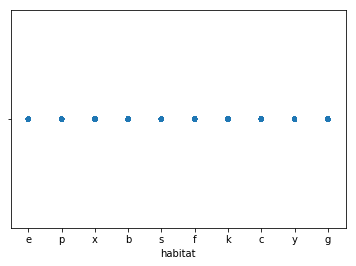

In [70]:
colNames = list(df)
for i in range(len(colNames)):
    sns.stripplot(df[colNames[i]])

In [21]:
# Modalities in class column: 2 classes poisonous 'p' or edible 'e'
df["class"].unique()

array(['p', 'e'], dtype=object)

In [38]:
# We have missing values for stalk-root feature coded as '?'. Let's check their numbers
df[df['stalk-root'] == '?'].shape[0]

2480

In [39]:
print("{} % of values are missing".format(round((df[df['stalk-root'] == '?'].shape[0]/df.shape[0])*100, 2)))

30.53 % of values are missing


In [44]:
mf = list()
for item in df['stalk-root'].unique():
    mf.append(df[df['stalk-root'] == item].shape[0])
max(mf)

3776

In [46]:
df['stalk-root'].unique()[mf.index(max(mf))]

'b'

In [9]:
# Spilt data: 80% training 20% test
train, test = train_test_split(df, test_size=0.2)

e    3385
p    3114
Name: class, dtype: int64

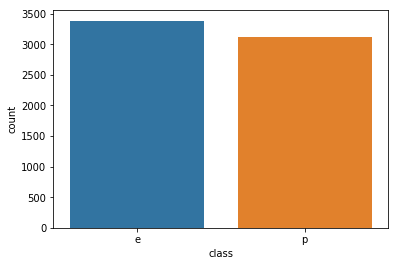

In [24]:
# Get responses of training
Y_train = train["class"]
# Get features of training
X_train = train.drop(labels = ["class"],axis = 1) 
Ytrain_distribution = sns.countplot(Y_train)
Y_train.value_counts()

e    823
p    802
Name: class, dtype: int64

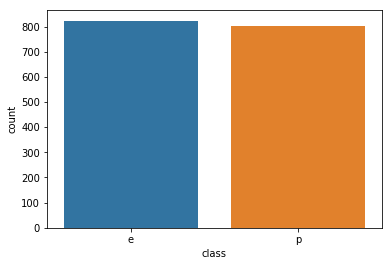

In [25]:
# Get responses of test
Y_test = test["class"]
# Get features of test
X_test = test.drop(labels = ["class"],axis = 1) 
Ytest_distribution = sns.countplot(Y_test)
Y_test.value_counts()